In [0]:
# Data manipulation
import numpy as np
import pandas as pd
# Plotting 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
# Statistical calculation
from scipy.stats import norm
# Data fetching\n",
import fix_yahoo_finance as yf
# Tabular data output\n",
from tabulate import tabulate 


In [0]:
import datetime as dt

In [0]:
tickers = ['AAPL','FB', 'C', 'DIS']
df = yf.download(tickers, start='2012-01-01',end=dt.date.today())['Close']
df=df.dropna()
returns = df.pct_change()

[*********************100%***********************]  4 of 4 downloaded


In [0]:
weights = np.array([.25, .3, .15, .3])

In [0]:
weights = weights*100000

In [0]:
weights = weights[np.newaxis,:]

In [0]:
weights.shape

(1, 4)

In [0]:
r = returns.to_numpy()

In [0]:
r = weights*r

In [0]:
r = np.sum(r,axis=1)

In [0]:
r.shape

(2002,)

In [0]:
r

array([           nan, -1363.93868309, -2097.4273751 , ...,
         590.00971395, -3005.69741289,   203.70672836])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


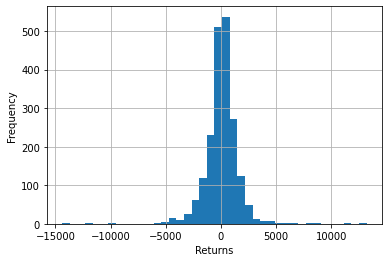

In [0]:
plt.hist(r,bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [0]:
df1 = pd.DataFrame(r)

In [0]:
df1.columns = ['Returns']

In [0]:
df1

,Returns
0,NaN
1,-1363.938683
2,-2097.427375
3,1773.227290
4,272.626908
...,...
1997,-699.607558
1998,5462.395887
1999,590.009714
2000,-3005.697413


In [0]:
df1.sort_values('Returns',inplace= True, ascending=True)

In [0]:
VaR_90= (df1['Returns' ].quantile(0.1))*(-1)
VaR_95=(df1['Returns'].quantile(0.05))*(-1) 
VaR_99= (df1['Returns' ].quantile(0.01))*(-1)

print( tabulate([['90%', VaR_90], ['95%' , VaR_95],['99%', VaR_99]], headers=['Confidence Level value', 'Hist_VaR']))

Confidence Level value      Hist_VaR
------------------------  ----------
90%                          1484.68
95%                          2112.57
99%                          4173.52


In [0]:
n_day = [-VaR_99]
for i in range(10):
  n_day.append(n_day[0]*np.sqrt(i+2))

In [0]:
x_axis = ['day1','day2','day3','day4','day5','day6','day7','day8','day9','day10','day11']
plt.plot(x_axis,n_day)
plt.ylabel("N-day VaR")
plt.show()

In [0]:
from scipy.io import loadmat ,savemat
savemat("historical_inv_sum.mat", {"array":r})
savemat("historical_nday_var.mat", {"array": n_day})